# 数据特征分析

## 分布分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']    # 图例中文显示问题
plt.rcParams['axes.unicode_minus'] = False

import os
os.getcwd()   # 显示当前的路径
os.chdir("D:/Alvin/python微专业/")  # 切换路径
os.listdir()  # 展示当前路径下的文件

['.DS_Store',
 'ar.npy',
 'ar.text',
 'data.pkl',
 'data1.txt',
 'pandas官方文档中文版.pdf',
 'pdtime.txt',
 'pic.png',
 'text.txt',
 'this.txt',
 '商铺数据.csv',
 '地市级党委书记数据库（2000-10）.xlsx',
 '深圳罗湖二手房信息.csv']

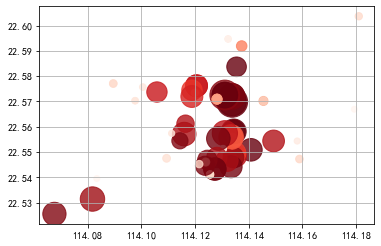

In [2]:
# 读取数据
data = pd.read_csv("深圳罗湖二手房信息.csv", engine='python', encoding='gbk')

plt.scatter(data['经度'], data['纬度'],
            s = data['房屋单价']/100,   # 点的大小
            c = data['参考总价'],   # 颜色深浅
            cmap= 'Reds',   # colormap
           alpha = 0.8
           )
plt.grid()

In [3]:
# 极差
def d_range(df, *cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return(krange)
key1 = '参考总价'
key2 = "参考首付"
dr = d_range(data, key1, key2)
print("%s极差为 %.2f\n%s极差为 %.2f" % (key1, dr[0], key2, dr[1]))

参考总价极差为 175.00
参考首付极差为 52.50


<AxesSubplot:>

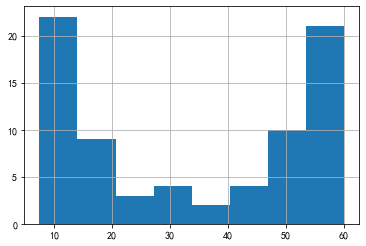

In [4]:
# 频率分布，直方图
data["参考首付"].hist(bins = 8)

In [5]:
# 频率分布情况，分组区间
gcut = pd.cut(data['参考首付'],
            10,   # 分成10组
              right= False   # 右开区间
             )
gcut_count = gcut.value_counts(sort=False)
data['%s分组区间' % key1] =  gcut.values
data.head()

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[12.75, 18.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[7.5, 12.75)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[12.75, 18.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[7.5, 12.75)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[49.5, 54.75)"


In [6]:
# 判断区间出现的频率
r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns={gcut_count.name:"频数"}, inplace= True)
r_zj["频率"] = r_zj["频数"]/sum(r_zj["频数"])
r_zj["累计频率"] = r_zj['频率'].cumsum()
r_zj["频率%"] = r_zj["频率"].apply(lambda x:"%.2f%%" % (x*100))
r_zj["累计频率%"] = r_zj["累计频率"].apply(lambda x:"%.2f%%" % (x*100))
r_zj.style.bar(subset = ['频率',"累计频率"], color = 'lightgreen')

,频数,频率,累计频率,频率%,累计频率%
"[7.5, 12.75)",14,0.186667,0.186667,18.67%,18.67%
"[12.75, 18.0)",17,0.226667,0.413333,22.67%,41.33%
"[18.0, 23.25)",1,0.013333,0.426667,1.33%,42.67%
"[23.25, 28.5)",2,0.026667,0.453333,2.67%,45.33%
"[28.5, 33.75)",4,0.053333,0.506667,5.33%,50.67%
"[33.75, 39.0)",2,0.026667,0.533333,2.67%,53.33%
"[39.0, 44.25)",3,0.040000,0.573333,4.00%,57.33%
"[44.25, 49.5)",4,0.053333,0.626667,5.33%,62.67%
"[49.5, 54.75)",8,0.106667,0.733333,10.67%,73.33%
"[54.75, 60.052)",20,0.266667,1.000000,26.67%,100.00%


(-1.1015361258245195,
 1.100073174620908,
 -1.1108870582984787,
 1.1268890844505215)

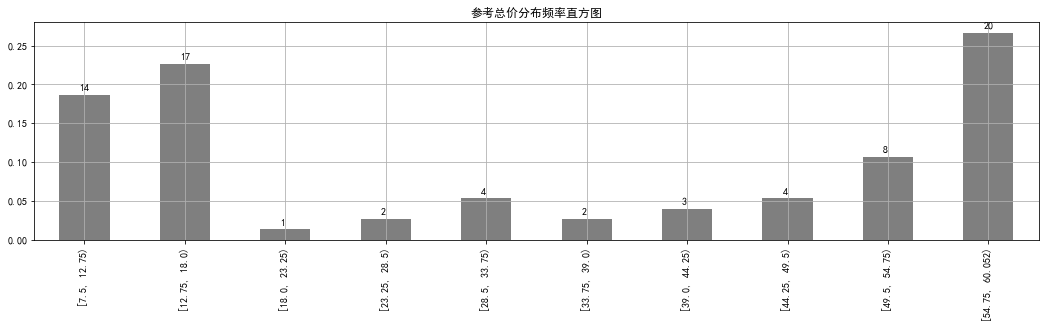

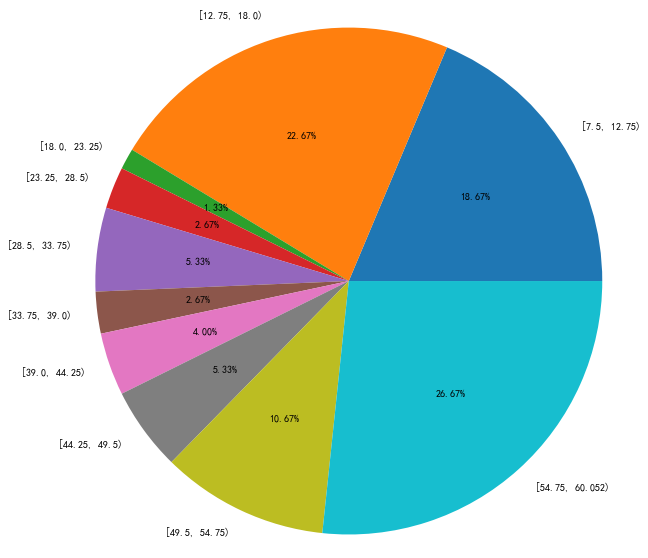

In [7]:
# 直方图
r_zj["频率"].plot(kind = "bar",
               figsize = (18,4),
                grid = True,
                color = 'k',
                alpha = 0.5
               )
plt.title("参考总价分布频率直方图")
# 添加标签

x = len(r_zj)
y = r_zj['频率']  # 标签y轴高度
m = r_zj["频数"]   # 标签值
for i,j,k in zip(range(x), y, m):
    plt.text(i-0.05, j+0.005, "%i" % k, color = 'k')


# 绘制饼图
plt.figure(num =2, figsize=(10,10)) # 添加一个图表
plt.pie(r_zj["频数"],
       labels= r_zj.index,
        autopct= '%.2f%%',   # 字段计算占比
#         shadow = True, # 展示阴影
       )
plt.axis('equal')

## 对比分析

In [10]:
'''
绝对数比较  相减
相对数比较  相除
'''

'\n绝对数比较  相减\n相对数比较  相除\n'

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

                A_sale      B_sale
2017-06-01  435.637187   85.616838
2017-06-02  464.130649  383.041753
2017-06-03  255.122197  806.134404
2017-06-04  476.505059  277.474818
2017-06-05  501.897936  177.704190


<AxesSubplot:title={'center':'AB产品销量对比-柱状图'}>

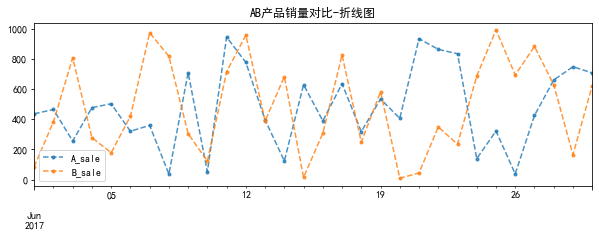

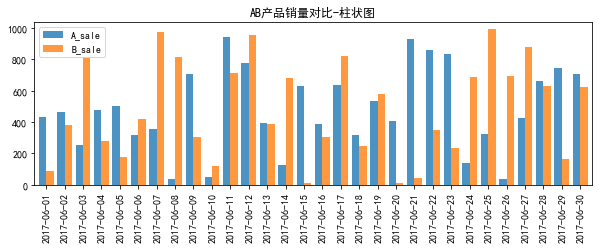

In [51]:
# 1、绝对数比较 → 相减
# 相互对比的指标在量级上不能差别过大
# （1）折线图比较
# （2）多系列柱状图比较

data = pd.DataFrame(np.random.rand(30,2)*1000,
                   columns = ['A_sale','B_sale'],
                   index = pd.period_range('20170601','20170630'))
print(data.head())
# 创建数据 → 30天内A/B产品的日销售额

data.plot(kind='line',
       style = '--.',
       alpha = 0.8,
       figsize = (10,3),
       title = 'AB产品销量对比-折线图')
# 折线图比较

data.plot(kind = 'bar',
          width = 0.8,
          alpha = 0.8,
          figsize = (10,3),
          title = 'AB产品销量对比-柱状图')
# 多系列柱状图比较

[Text(0, 0, '2017-06-01'),
 Text(6, 0, '2017-06-07'),
 Text(12, 0, '2017-06-13'),
 Text(18, 0, '2017-06-19'),
 Text(24, 0, '2017-06-25')]

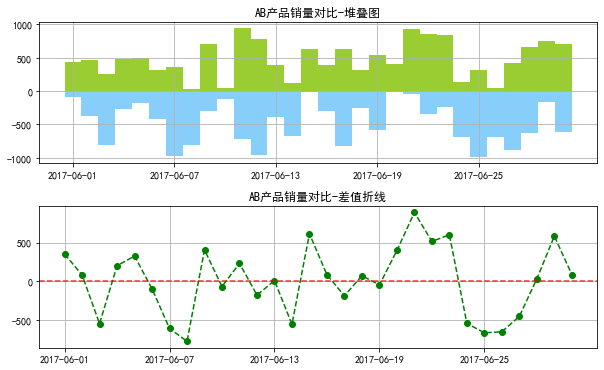

In [53]:
# 1、绝对数比较 → 相减
# （3）柱状图堆叠图+差值折线图比较

fig3 = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=0.3)
# 创建子图及间隔设置

ax1 = fig3.add_subplot(2,1,1)  
x = range(len(data))
y1 = data['A_sale']
y2 = -data['B_sale']
plt.bar(x,y1,width = 1,facecolor = 'yellowgreen')
plt.bar(x,y2,width = 1,facecolor = 'lightskyblue')
plt.title('AB产品销量对比-堆叠图')
plt.grid()
plt.xticks(range(0,30,6))
ax1.set_xticklabels(data.index[::6])
# 创建堆叠图

ax2 = fig3.add_subplot(2,1,2)  
y3 = data['A_sale']-data['B_sale']
plt.plot(x,y3,'--go')
plt.axhline(0,color='r',linestyle="--",alpha=0.8)  # 添加y轴参考线
plt.grid()
plt.title('AB产品销量对比-差值折线')
plt.xticks(range(0,30,6))
ax2.set_xticklabels(data.index[::6])
# 创建差值折线图

                A_sale      B_sale
2017-06-01  952.257360   22.633760
2017-06-02  102.854934   90.951461
2017-06-03  823.519609   34.379733
2017-06-04  750.207007   12.628682
2017-06-05  901.446840  199.603648
------
                A_sale      B_sale     A_per     B_per A_per% B_per%
2017-06-01  952.257360   22.633760  0.062285  0.007017  6.23%  0.70%
2017-06-02  102.854934   90.951461  0.006728  0.028196  0.67%  2.82%
2017-06-03  823.519609   34.379733  0.053865  0.010658  5.39%  1.07%
2017-06-04  750.207007   12.628682  0.049069  0.003915  4.91%  0.39%
2017-06-05  901.446840  199.603648  0.058962  0.061879  5.90%  6.19%


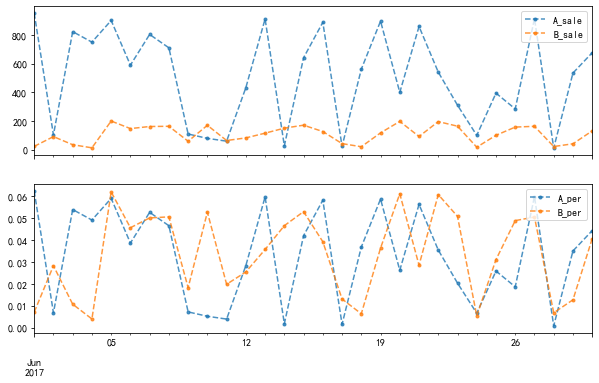

In [54]:
# 2、相对数比较 → 相除
# 有联系的指标综合计算后的对比，数值为相对数
# 结构分析、比例分析、空间比较分析、动态对比分析、计划完成度分析
# （1）结构分析
# 在分组基础上，各组总量指标与总体的总量指标对比，计算出各组数量在总量中所占比重
# 反映总体的内部结构

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*200},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A/B产品的日销售额
# A/B产品销售额量级不同

data['A_per'] = data['A_sale'] / data['A_sale'].sum()
data['B_per'] = data['B_sale'] / data['B_sale'].sum()
# 计算出每天的营收占比

data['A_per%'] = data['A_per'].apply(lambda x: '%.2f%%' % (x*100))
data['B_per%'] = data['B_per'].apply(lambda x: '%.2f%%' % (x*100))
# 转换为百分数
print(data.head())

fig,axes = plt.subplots(2,1,figsize = (10,6),sharex=True)
data[['A_sale','B_sale']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[0])
axes[0].legend(loc = 'upper right')
data[['A_per','B_per']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[1])
axes[1].legend(loc = 'upper right')
# 绝对值对比较难看出结构性变化，通过看销售额占比来看售卖情况的对比

# 同时可以反应“强度” → 两个性质不同但有一定联系的总量指标对比，用来说明“强度”、“密度”、“普遍程度”
# 例如：国内生产总值“元/人”，人口密度“人/平方公里”

         consumption       salary
2017-01  2607.570249  5497.784700
2017-02  2186.453720  5350.558850
2017-03  2035.040377  5266.155725
2017-04  2219.930674  5187.191477
2017-05  2776.015093  5151.820787
------
         consumption       salary       c_s
2017-01  2607.570249  5497.784700  0.474295
2017-02  2186.453720  5350.558850  0.408640
2017-03  2035.040377  5266.155725  0.386438
2017-04  2219.930674  5187.191477  0.427964
2017-05  2776.015093  5151.820787  0.538842


<AxesSubplot:>

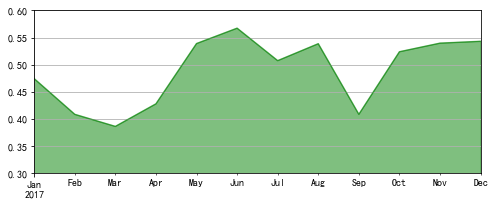

In [55]:
# 2、相对数比较 → 相除
# （2）比例分析
# 在分组的基础上，将总体不同部分的指标数值进行对比，其相对指标一般称为“比例相对数”
# 比例相对数 = 总体中某一部分数值 / 总体中另一部分数值 → “基本建设投资额中工业、农业、教育投资的比例”、“男女比例”...

data = pd.DataFrame({'consumption':np.random.rand(12)*1000 + 2000,
                    'salary':np.random.rand(12)*500 + 5000},
                   index = pd.period_range('2017/1','2017/12',freq = 'M'))
print(data.head())
print('------')
# 创建数据 → 某人一年内的消费、工资薪水情况
# 消费按照2000-3000/月随机，工资按照5000-5500/月随机

data['c_s'] = data['consumption'] / data['salary']
print(data.head())
# 比例相对数 → 消费收入比

data['c_s'].plot.area(color = 'green',alpha = 0.5,ylim = [0.3,0.6],figsize=(8,3),grid=True)
# 创建面积图表达

## 统计分析

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']    # 图例中文显示问题
plt.rcParams['axes.unicode_minus'] = False

### 集中趋势

In [69]:
# 1、集中趋势度量
# 指一组数据向某一中心靠拢的倾向，核心在于寻找数据的代表值或中心值 —— 统计平均数
# 算数平均数、位置平均数
# （1）算数平均数

data = pd.DataFrame({'value':np.random.randint(100,120,100),
                    'f':np.random.rand(100)})
data['f'] = data['f'] / data['f'].sum()  # f为权重，这里将f列设置成总和为1的权重占比
print(data.head())
print('------')
# 创建数据

mean = data['value'].mean()
print('简单算数平均值为：%.2f' % mean)
# 简单算数平均值 = 总和 / 样本数量 （不涉及权重）

mean_w = (data['value'] * data['f']).sum() / data['f'].sum()
print('加权算数平均值为：%.2f' % mean_w)
# 加权算数平均值 = (x1f1 + x2f2 + ... + xnfn) / (f1 + f2 + ... + fn)

   value         f
0    117  0.017119
1    105  0.011883
2    109  0.013129
3    101  0.010729
4    116  0.000598
------
简单算数平均值为：109.86
加权算数平均值为：110.34


众数为 [111]
中位数为111


Text(114.81, 0.015, '中位数：111')

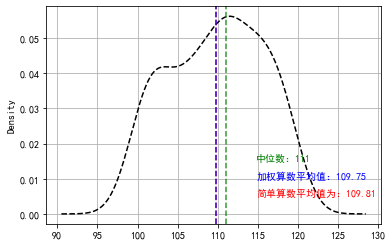

In [101]:
# 1、集中趋势度量
# （2）位置平均数

m = data['value'].mode()
print('众数为',m.tolist())
# 众数是一组数据中出现次数最多的数，这里可能返回多个值

med = data['value'].median()
print('中位数为%i' % med)
# 中位数指将总体各单位标志按照大小顺序排列后，中间位置的数字

data['value'].plot(kind = 'kde',style = '--k',grid = True)
# 密度曲线

plt.axvline(mean,color='r',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.005,'简单算数平均值为：%.2f' % mean, color = 'r')
# 简单算数平均值

plt.axvline(mean_w,color='b',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.01,'加权算数平均值：%.2f' % mean_w, color = 'b')
# 加权算数平均值

plt.axvline(med,color='g',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.015,'中位数：%i' % med, color = 'g')
# 中位数
# **这里三个数text显示的横坐标一致，目的是图示效果不拥挤

### 离散程度

销售a的极差是：999.48, 销售b的极差是：998.26
销售a的iqr是：494.80, 销售b的iqr是：526.68


<AxesSubplot:>

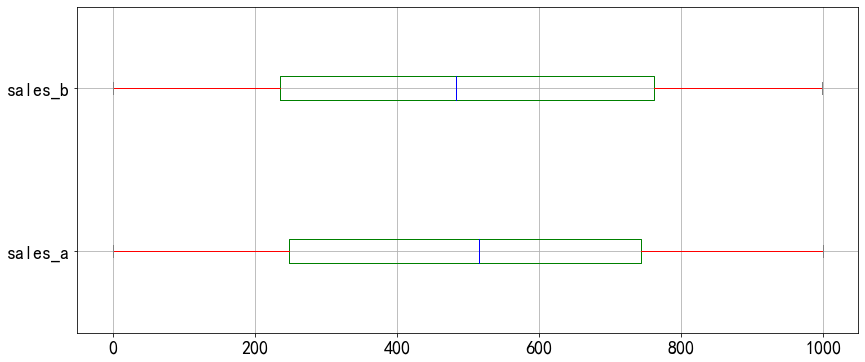

In [126]:
# 极差
data = pd.DataFrame(np.random.rand(1000,2)*1000,
                   columns = ['sales_a','sales_b'],
                    index = pd.period_range(start = '20210101', periods=1000)
                   )
a_r = data['sales_a'].max() - data['sales_a'].min()
b_r = data['sales_b'].max() - data['sales_b'].min()
print("销售a的极差是：%.2f, 销售b的极差是：%.2f" % (a_r, b_r))

# 四分位差 IQR
sta = data['sales_a'].describe()
stb = data['sales_b'].describe()
a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']
print("销售a的iqr是：%.2f, 销售b的iqr是：%.2f" % (a_iqr, b_iqr))

color = dict(boxes = 'green', whiskers = 'red', medians = 'blue', caps = 'gray')
plt.figure(figsize = (14,6))
data.boxplot(vert = False, fontsize = 18, color = color)

销售a的标准差为：283.48,销售b的标准差为294.36
销售a的方差为：80363.27,销售b的方差为86644.97


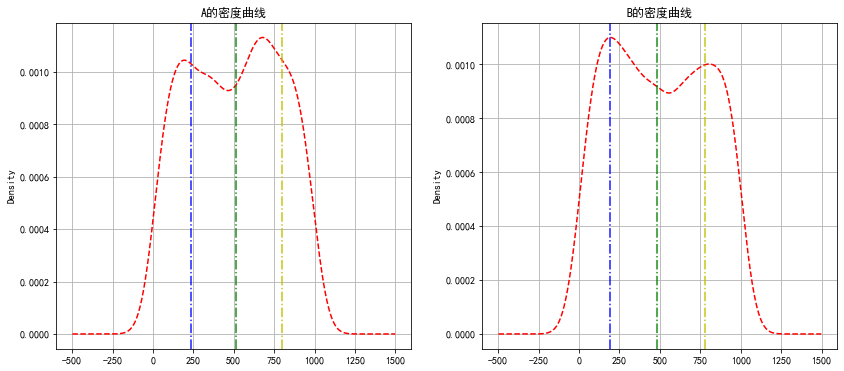

In [147]:
# 2、离中趋势度量
# （2）方差与标准差, 

a_std = sta.loc['std']
b_std = stb.loc['std']   # 标准差也可以用 .std()方法
a_var = data['sales_a'].var()
b_var = data['sales_b'].var()
print("销售a的标准差为：%.2f,销售b的标准差为%.2f" % (a_std, b_std))
print("销售a的方差为：%.2f,销售b的方差为%.2f" % (a_var, b_var))


# 方差 → 各组中数值与算数平均数离差平方的算术平均数
# 标准差 → 方差的平方根
# 标准差是最常用的离中趋势指标 → 标准差越大，离中趋势越明显

 
# A密度曲线，1个标准差

fig = plt.figure(figsize  = (14,6))
ax1 = fig.add_subplot(1,2,1)
data['sales_a'].plot(kind = 'kde', style = '--', color= 'red', grid = True, title= 'A的密度曲线')
plt.axvline(sta.loc['50%'], color = 'g', linestyle = '-.', alpha = 0.9)
plt.axvline(sta.loc['50%'] + a_std, color = 'y', linestyle = '-.', alpha = 0.9)
plt.axvline(sta.loc['50%'] - a_std, color = 'b', linestyle = '-.', alpha = 0.9)

ax2 = fig.add_subplot(1,2,2)
data['sales_b'].plot(kind = 'kde', style = '--', color= 'red', grid = True, title= 'B的密度曲线')
plt.axvline(stb.loc['50%'], color = 'g', linestyle = '-.', alpha = 0.9)
plt.axvline(stb.loc['50%'] + b_std, color = 'y', linestyle = '-.', alpha = 0.9)
plt.axvline(stb.loc['50%'] - b_std, color = 'b', linestyle = '-.', alpha = 0.9)




# B密度曲线，1个标准差

## 帕累托分析

In [148]:
'''

帕累托分析（贡献度分析） → 帕累托法则：20/80定律

“原因和结果、投入和产出、努力和报酬之间本来存在着无法解释的不平衡。一般来说，投入和努力可以分为两种不同的类型：
多数，它们只能造成少许的影响；少数，它们造成主要的、重大的影响。”
→ 一个公司，80%利润来自于20%的畅销产品，而其他80%的产品只产生了20%的利润

例如：
** 世界上大约80％的资源是由世界上15％的人口所耗尽的
** 世界财富的80％为25％的人所拥有；在一个国家的医疗体系中
** 20％的人口与20％的疾病，会消耗80％的医疗资源。

一个思路：通过二八原则，去寻找关键的那20%决定性因素！

'''

'\n\n帕累托分析（贡献度分析） → 帕累托法则：20/80定律\n\n“原因和结果、投入和产出、努力和报酬之间本来存在着无法解释的不平衡。一般来说，投入和努力可以分为两种不同的类型：\n多数，它们只能造成少许的影响；少数，它们造成主要的、重大的影响。”\n→ 一个公司，80%利润来自于20%的畅销产品，而其他80%的产品只产生了20%的利润\n\n例如：\n** 世界上大约80％的资源是由世界上15％的人口所耗尽的\n** 世界财富的80％为25％的人所拥有；在一个国家的医疗体系中\n** 20％的人口与20％的疾病，会消耗80％的医疗资源。\n\n一个思路：通过二八原则，去寻找关键的那20%决定性因素！\n\n'

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A    2444.002888
B    2100.390962
C    2074.076483
D    5067.740865
E    1986.913636
F    3148.288372
G    3945.107504
H    2272.988752
I    2980.419339
J    2454.165014
dtype: float64
------
超过80%累计占比的节点值索引为： B
超过80%累计占比的节点值索引位置为： 7
------
核心产品为：
D    5067.740865
G    3945.107504
F    3148.288372
I    2980.419339
J    2454.165014
A    2444.002888
H    2272.988752
B    2100.390962
dtype: float64


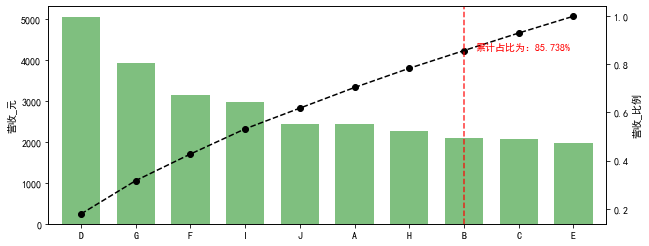

In [203]:
# 帕累托分布分析 

data = pd.Series(np.random.randn(10)*1200+3000,
                index = list('ABCDEFGHIJ'))
print(data)
print('------')
# 创建数据，10个品类产品的销售额

data.sort_values(ascending=False, inplace= True)
# 由大到小排列

plt.figure(figsize = (10,4))
data.plot(kind = 'bar', color = 'g', alpha = 0.5, width = 0.7)  
plt.ylabel('营收_元')
# 创建营收柱状图

p = data.cumsum()/data.sum()  # 创建累计占比，Series
key = p[p>0.8].index[0]  
key_num = data.index.tolist().index(key) 
print('超过80%累计占比的节点值索引为：' ,key)
print('超过80%累计占比的节点值索引位置为：' ,key_num)
print('------')
# 找到累计占比超过80%时候的index
# 找到key所对应的索引位置

p.plot(style = '--ko', secondary_y=True)  # secondary_y → y副坐标轴
plt.axvline(key_num,color='r',linestyle="--",alpha=0.8)  
plt.text(key_num+0.2,p[key],'累计占比为：%.3f%%' % (p[key]*100), color = 'r')  # 累计占比超过80%的节点
plt.ylabel('营收_比例')
# 绘制营收累计占比曲线

key_product = data.loc[:key]
print('核心产品为：')
print(key_product)
# 输出决定性因素产品

## 正态性检验

In [204]:
'''
利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。

直方图初判 / QQ图判断 / K-S检验
'''

'\n利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。\n\n直方图初判 / QQ图判断 / K-S检验\n'

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

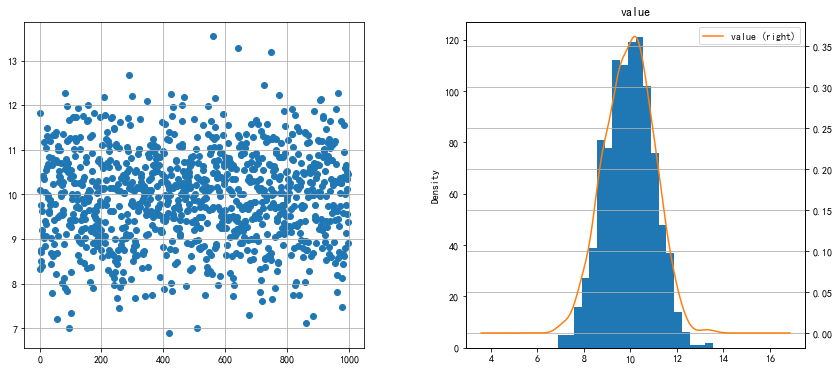

In [212]:
# 直方图判断
s = pd.DataFrame(np.random.randn(1000)+10, columns = ['value'])
s.head()
fig = plt.figure(figsize = (14,6))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(s.index, s.value)
plt.grid()

ax2 = fig.add_subplot(1,2,2)
s.hist(bins = 20,ax = ax2)
s.plot(kind = 'kde', secondary_y = True, ax = ax2)
plt.grid()

       value
0  10.311641
1   7.343533
2  10.619073
3  10.986840
4   7.912965
均值为：9.94，标准差为：1.02
------
   index     value       p         q
0    994  6.699334 -0.0005 -3.187020
1    976  6.754214  0.0005 -3.133021
2    887  7.026299  0.0015 -2.865306
3    356  7.198693  0.0025 -2.695681
4      1  7.343533  0.0035 -2.553167
------
四分之一位数为：9.26，四分之三位数为：10.64
------


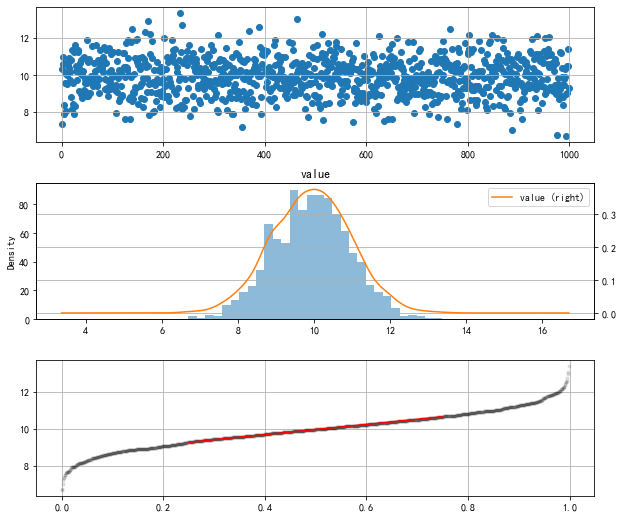

In [217]:
# QQ图判断
# QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况

# QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图
# 参考直线：四分之一分位点和四分之三分位点这两点确定，看散点是否落在这条线的附近

# 绘制思路
# ① 在做好数据清洗后，对数据进行排序（次序统计量：x(1)<x(2)<....<x(n)）
# ② 排序后，计算出每个数据对应的百分位p{i}，即第i个数据x(i)为p(i)分位数，其中p(i)=(i-0.5)/n （pi有多重算法，这里以最常用方法为主）
# ③ 绘制直方图 + qq图，直方图作为参考

s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
print(s.head())
# 创建随机数据

mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f，标准差为：%.2f' % (mean,std))
print('------')
#  计算均值，标准差

s.sort_values(by = 'value', inplace = True)  # 重新排序
s_r = s.reset_index(drop = False)  # 重新排序后，更新index
s_r['p'] = (s_r.index - 0.5) / len(s_r)  
s_r['q'] = (s_r['value'] - mean) / std
print(s_r.head())
print('------')
# 计算百分位数 p(i)
# 计算q值

st = s['value'].describe()
x1 ,y1 = 0.25, st['25%']
x2 ,y2 = 0.75, st['75%']
print('四分之一位数为：%.2f，四分之三位数为：%.2f' % (y1,y2))
print('------')
# 计算四分之一位数、四分之三位数

fig = plt.figure(figsize = (10,9))
ax1 = fig.add_subplot(3,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()
# 绘制数据分布图

ax2 = fig.add_subplot(3,1,2)  # 创建子图2
s.hist(bins=30,alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()
# 绘制直方图

ax3 = fig.add_subplot(3,1,3)  # 创建子图3
ax3.plot(s_r['p'],s_r['value'],'k.',alpha = 0.1)
ax3.plot([x1,x2],[y1,y2],'-r')   # 添加一条直线
plt.grid()
# 绘制QQ图，直线为四分之一位数、四分之三位数的连线，基本符合正态分布

样本均值为：79.74，样本标准差为：5.94
------
实际观测D值为：0.1597


,血糖浓度,次数,累计次数,累计频率,标准化取值,理论分布,D
0,68,2,2,0.057143,-1.977701,0.0244,0.032743
1,72,2,4,0.114286,-1.304031,0.0968,0.017486
2,75,2,6,0.171429,-0.798779,0.2148,0.043371
3,76,2,8,0.228571,-0.630362,0.2643,0.035729
4,77,6,14,0.400000,-0.461945,0.3228,0.077200
5,78,3,17,0.485714,-0.293527,0.3859,0.099814
6,80,6,23,0.657143,0.043307,0.5160,0.141143
7,81,3,26,0.742857,0.211725,0.5832,0.159657
8,84,2,28,0.800000,0.716977,0.7611,0.038900
9,86,2,30,0.857143,1.053811,0.8531,0.004043


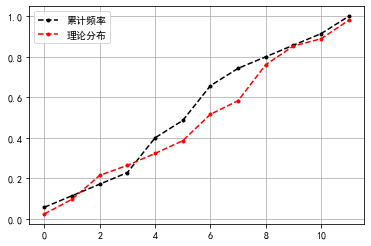

In [218]:
# KS检验，理论推导

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data, columns =['value'])
u = df['value'].mean()
std = df['value'].std()
print("样本均值为：%.2f，样本标准差为：%.2f" % (u,std))
print('------')
# 查看数据基本统计量

s = df['value'].value_counts().sort_index()
df_s = pd.DataFrame({'血糖浓度':s.index,'次数':s.values})
# 创建频率数据

df_s['累计次数'] = df_s['次数'].cumsum()
df_s['累计频率'] = df_s['累计次数'] / len(data)
df_s['标准化取值'] = (df_s['血糖浓度'] - u) / std
df_s['理论分布'] =[0.0244,0.0968,0.2148,0.2643,0.3228,0.3859,0.5160,0.5832,0.7611,0.8531,0.8888,0.9803]  # 通过查阅正太分布表
df_s['D'] = np.abs(df_s['累计频率'] - df_s['理论分布'])
dmax = df_s['D'].max()
print("实际观测D值为：%.4f" % dmax)
# D值序列计算结果表格

df_s['累计频率'].plot(style = '--k.')
df_s['理论分布'].plot(style = '--r.')
plt.legend(loc = 'upper left')
plt.grid()
# 密度图表示

df_s

In [220]:
# 直接用算法做KS检验

from scipy import stats
# scipy包是一个高级的科学计算库，它和Numpy联系很密切，Scipy一般都是操控Numpy数组来进行科学计算

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data, columns =['value'])
u = df['value'].mean()  # 计算均值
std = df['value'].std()  # 计算标准差
stats.kstest(df['value'], 'norm', (u, std))
# .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
# 结果返回两个值：statistic → D值，pvalue → P值
# p值大于0.05，为正态分布

KstestResult(statistic=0.1590180704824098, pvalue=0.3056480127078781)

## 相关性分析

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

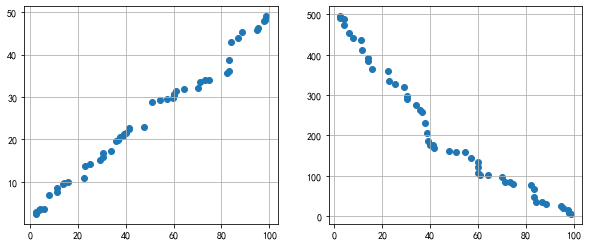

In [228]:
# 图示初判
# （1）变量之间的线性相关性

data1 = pd.Series(np.random.rand(50)*100).sort_values()
data2 = pd.Series(np.random.rand(50)*50).sort_values()
data3 = pd.Series(np.random.rand(50)*500).sort_values(ascending = False)
# 创建三个数据：data1为0-100的随机数并从小到大排列，data2为0-50的随机数并从小到大排列，data3为0-500的随机数并从大到小排列，

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(data1, data2)
plt.grid()
# 正线性相关

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(data1, data3)
plt.grid()
# 负线性相关

,A,B,C,D
0,52.215707,-108.686094,102.817333,59.491324
1,26.034151,146.853326,-31.088018,27.196306
2,27.638226,-3.961717,14.037880,149.670057
3,159.036823,-35.517115,38.615763,-10.912417
4,101.154536,111.300655,109.903132,129.961938


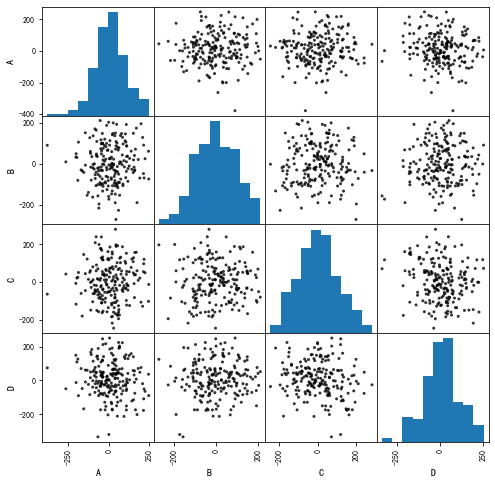

In [235]:
# 图示初判
# （2）散点图矩阵初判多变量间关系

data = pd.DataFrame(np.random.randn(200,4)*100, columns = ['A','B','C','D'])
pd.plotting.scatter_matrix(data,figsize=(8,8),
                  c = 'k',
                 marker = '.',
                 diagonal='hist',
                 alpha = 0.8,
                 range_padding=0.1)
data.head()

In [236]:
# Pearson相关系数

data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                     'value2':data2.values})
print(data.head())
print('------')
# 创建样本数据

u1,u2 = data['value1'].mean(),data['value2'].mean()  # 计算均值
std1,std2 = data['value1'].std(),data['value2'].std()  # 计算标准差
print('value1正态性检验：\n',stats.kstest(data['value1'], 'norm', (u1, std1)))
print('value2正态性检验：\n',stats.kstest(data['value2'], 'norm', (u2, std2)))
print('------')
# 正态性检验 → pvalue >0.05

data['(x-u1)*(y-u2)'] = (data['value1'] - u1) * (data['value2'] - u2)
data['(x-u1)**2'] = (data['value1'] - u1)**2
data['(y-u2)**2'] = (data['value2'] - u2)**2
print(data.head())
print('------')
# 制作Pearson相关系数求值表

r = data['(x-u1)*(y-u2)'].sum() / (np.sqrt(data['(x-u1)**2'].sum() * data['(y-u2)**2'].sum()))
print('Pearson相关系数为：%.4f' % r)
# 求出r
# |r| > 0.8 → 高度线性相关

     value1    value2
0  0.590293  0.064967
1  3.252229  0.301632
2  4.689103  1.333674
3  4.980036  1.686689
4  6.033911  1.961420
------
value1正态性检验：
 KstestResult(statistic=0.1131874951534737, pvalue=0.1427367062232605)
value2正态性检验：
 KstestResult(statistic=0.0890890228832586, pvalue=0.3829181169886424)
------
     value1    value2  (x-u1)*(y-u2)    (x-u1)**2   (y-u2)**2
0  0.590293  0.064967    1045.980656  2255.725122  485.021655
1  3.252229  0.301632     976.746013  2009.956569  474.653427
2  4.689103  1.333674     900.655327  1883.183755  430.749264
3  4.980036  1.686689     879.400551  1858.017928  416.220596
4  6.033911  1.961420     846.347285  1768.274589  405.086253
------
Pearson相关系数为：0.9925


In [237]:
# Pearson相关系数 - 算法

data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                     'value2':data2.values})
print(data.head())
print('------')
# 创建样本数据

data.corr()
# pandas相关性方法：data.corr(method='pearson', min_periods=1) → 直接给出数据字段的相关系数矩阵
# method默认pearson

     value1    value2
0  0.620190  0.000415
1  2.027528  0.437797
2  2.621582  0.456967
3  2.657289  0.669603
4  3.049241  0.716093
------


,value1,value2
value1,1.000000,0.995099
value2,0.995099,1.000000


In [239]:
# Sperman秩相关系数

data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
# print(data)
# print('------')
# 创建样本数据

data.sort_values('智商', inplace=True)
data['range1'] = np.arange(1,len(data)+1)
data.sort_values('每周看电视小时数', inplace=True)
data['range2'] = np.arange(1,len(data)+1)
# print(data)
# print('------')
# “智商”、“每周看电视小时数”重新按照从小到大排序，并设定秩次index

data['d'] = data['range1'] - data['range2']
data['d2'] = data['d']**2
# print(data)
# print('------')
# 求出di，di2

n = len(data)
rs = 1 - 6 * (data['d2'].sum()) / (n * (n**2 - 1))
print('Pearson相关系数为：%.4f' % rs)
# 求出rs

Pearson相关系数为：-0.1758


In [240]:
# Pearson相关系数 - 算法

data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('------')
# 创建样本数据

data.corr(method='spearman')
# pandas相关性方法：data.corr(method='pearson', min_periods=1) → 直接给出数据字段的相关系数矩阵
# method默认pearson

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
------


,智商,每周看电视小时数
智商,1.000000,-0.175758
每周看电视小时数,-0.175758,1.000000


# 数据处理

## 缺失值处理

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [248]:
# 判断是否有缺失值数据 - isnull，notnull
# isnull：缺失值为True，非缺失值为False
# notnull：缺失值为False，非缺失值为True

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
# 创建数据

print(s.isnull())  # Series直接判断是否是缺失值，返回一个Series
print(df.notnull())  # Dataframe直接判断是否是缺失值，返回一个Series
print(df['value1'].notnull())  # 通过索引判断
print('------')

s2 = s[s.isnull() == False]  
df2 = df[df['value2'].notnull()]    # 注意和 df2 = df[df['value2'].notnull()] ['value1'] 的区别
print(s2)
print(df2)
# 筛选非缺失值

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool
    value1  value2
0     True    True
1     True    True
2     True    True
3     True    True
4    False    True
5    False   False
6     True   False
7     True    True
8    False    True
9     True   False
10    True    True
0      True
1      True
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9      True
10     True
Name: value1, dtype: bool
------
0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4      NaN      e
7     54.0      f
8      NaN      g
10   190.0      g


In [249]:
# 删除缺失值 - dropna

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
# 创建数据

s.dropna(inplace = True)
df2 = df['value1'].dropna()
print(s)
print(df2)
# drop方法：可直接用于Series，Dataframe
# 注意inplace参数，默认False → 生成新的值

0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
0      12.0
1      33.0
2      45.0
3      23.0
6      66.0
7      54.0
9      99.0
10    190.0
Name: value1, dtype: float64


In [250]:

# 填充/替换缺失数据 - fillna、replace

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
# 创建数据

s.fillna(0,inplace = True)
print(s)
print('------')
# s.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
# value：填充值
# 注意inplace参数


0    12.0
1    33.0
2    45.0
3    23.0
4     0.0
5     0.0
6    66.0
7    54.0
8     0.0
9    99.0
dtype: float64
------


In [251]:
df['value1'].fillna(method = 'pad',inplace = True)
print(df)
print('------')
# method参数：
# pad / ffill → 用之前的数据填充 
# backfill / bfill → 用之后的数据填充 

s = pd.Series([1,1,1,1,2,2,2,3,4,5,np.nan,np.nan,66,54,np.nan,99])
s.replace(np.nan,'缺失数据',inplace = True)
print(s)
print('------')
# df.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad', axis=None)
# to_replace → 被替换的值
# value → 替换值

s.replace([1,2,3],np.nan,inplace = True)
print(s)
# 多值用np.nan代替

    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4     23.0      e
5     23.0    NaN
6     66.0    NaN
7     54.0      f
8     54.0      g
9     99.0    NaN
10   190.0      g
------
0      1.0
1      1.0
2      1.0
3      1.0
4      2.0
5      2.0
6      2.0
7      3.0
8      4.0
9      5.0
10    缺失数据
11    缺失数据
12    66.0
13    54.0
14    缺失数据
15    99.0
dtype: object
------
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      4.0
9      5.0
10    缺失数据
11    缺失数据
12    66.0
13    54.0
14    缺失数据
15    99.0
dtype: object


In [252]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （1）均值/中位数/众数插补

s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])
#print(s)
print('------')
# 创建数据

u = s.mean()     # 均值
me = s.median()  # 中位数
mod = s.mode()   # 众数
print('均值为：%.2f, 中位数为：%.2f' % (u,me))
print('众数为：', mod.tolist())
print('------')
# 分别求出均值/中位数/众数

s.fillna(u,inplace = True)
print(s)
# 用均值填补

------
均值为：4.56, 中位数为：4.50
众数为： [5.0]
------
0      1.0000
1      2.0000
2      3.0000
3      4.5625
4      3.0000
5      4.0000
6      5.0000
7      5.0000
8      5.0000
9      5.0000
10     4.5625
11     4.5625
12     6.0000
13     6.0000
14     7.0000
15    12.0000
16     2.0000
17     4.5625
18     3.0000
19     4.0000
dtype: float64


In [253]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （2）临近值插补

s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])
#print(s)
print('------')
# 创建数据

s.fillna(method = 'ffill',inplace = True)
print(s)
# 用前值插补

------
0      1.0
1      2.0
2      3.0
3      3.0
4      3.0
5      4.0
6      5.0
7      5.0
8      5.0
9      5.0
10     5.0
11     5.0
12     6.0
13     6.0
14     7.0
15    12.0
16     2.0
17     2.0
18     3.0
19     4.0
dtype: float64


         2
-0.1111 x + 0.3333 x + 10
10.000000000000002


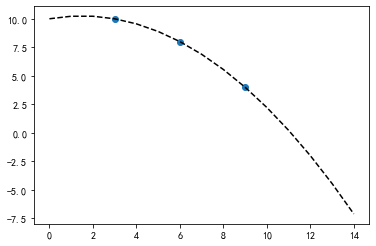

In [262]:
# 拉格朗日插值法
from scipy.interpolate import lagrange
x = [3, 6, 9]
y = [10, 8, 4]
plt.scatter(x, y)

print(lagrange(x, y))
# 验证这个函数的结果
# def yy(x):
#     return(-0.1111*(x**2) + 0.3333 * x + 10)

# for i in x:
#     print(yy(i))
print(lagrange(x,y)(3))   # 这个写法的含义是，根据拉格朗日定理计算的函数，当x = 3时，得到的y的结果是10.00000

# 拟合这几个点
df =pd.DataFrame({'x':np.arange(15)})
df['y'] = lagrange(x, y)(df['x'])
plt.plot(df['x'], df['y'], linestyle = '--', color = 'k')

总数据量100
缺失值数量9
缺失值占比0.09%
----------
0    53.125914
1    95.401265
2     3.445767
3          NaN
4    24.157354
dtype: float64
---------
-5.593932087112734
2.7269749233561242
89.244384765625
146.54736328125
15.681640625
61.603515625
962.1875
246.0
260.0
finished


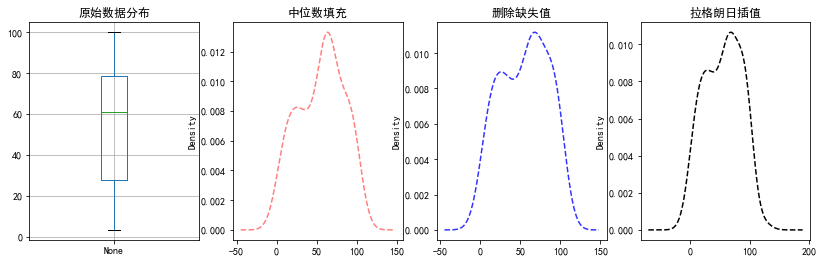

In [332]:
# 缺失值插补方式的对比
data = pd.Series(np.random.rand(100)*100)
data[3,6,33,56,45,66,67,80,90] = np.nan
data_na = data[data.isnull()]
# print(data.head())
print('总数据量%i' % len(data))
print("缺失值数量%i" % len(data_na))
print("缺失值占比%.2f%%" % (len(data_na)/len(data)))

# 中位数填充缺失值
data_c = data.fillna(data.median())
# 删除缺失值
data_r = data.dropna()

fig, axes = plt.subplots(1, 4, figsize = (14,4))  # 创建画布
data.plot.box(ax = axes[0], grid = True, title = "原始数据分布")
data_c.plot(kind = 'kde', ax = axes[1], linestyle = '--', color = 'red', alpha = 0.5, title = "中位数填充")
data_r.plot(kind ='kde', ax = axes[2], linestyle = '--', color = 'b', alpha = 0.8, title = '删除缺失值')

print("----------")
print(data.head())

print("---------")
# 拉格朗日插值法， 根据缺失值前后5项进行估计缺失值
def na_c(s, n, k = 5):
    start = 0 if n-k <0 else n-k
    y = s[list(range(start, n+k+1))]
    y = y[y.notnull()]
    return(lagrange(y.index, list(y))(n))

na_re = []
for i in range(len(data)):
    if data.isnull()[i]:
        data[i] =na_c(data, i)
        print(na_c(data, i))
        na_re.append(data[i])
        
# print(data.head())
data.dropna(inplace= True)
data.plot(kind = 'kde', style ='--k', title = "拉格朗日插值",ax = axes[3])
print("finished")

## 异常值处理

In [333]:
'''
异常值是指样本中的个别值，其数值明显偏离其余的观测值。
异常值也称离群点，异常值的分析也称为离群点的分析

异常值分析 → 3σ原则 / 箱型图分析
异常值处理方法 → 删除 / 修正填补
'''

'\n异常值是指样本中的个别值，其数值明显偏离其余的观测值。\n异常值也称离群点，异常值的分析也称为离群点的分析\n\n异常值分析 → 3σ原则 / 箱型图分析\n异常值处理方法 → 删除 / 修正填补\n'

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

均值为：0.730，标准差为：100.055
------
异常值共24条


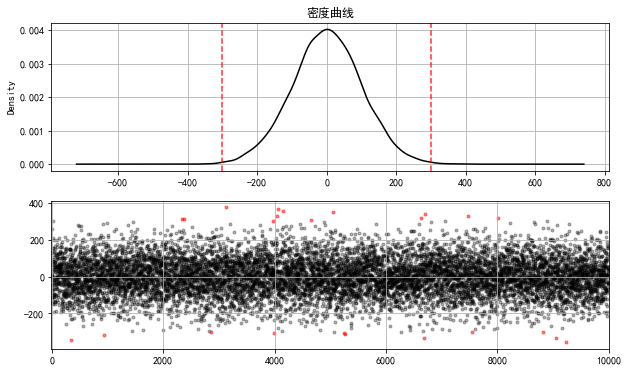

In [349]:
# 异常值分析
# （1）3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍的值 → p(|x - μ| > 3σ) ≤ 0.003

data = pd.Series(np.random.randn(10000)*100)
# 创建数据

u = data.mean()  # 计算均值
std = data.std()  # 计算标准差
stats.kstest(data, 'norm', (u, std))
print('均值为：%.3f，标准差为：%.3f' % (u,std))
print('------')
# 正态性检验

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
data.plot(kind = 'kde',grid = True,style = '-k',title = '密度曲线')
plt.axvline(3*std,color='r',linestyle="--",alpha=0.8) 
plt.axvline(-3*std,color='r',linestyle="--",alpha=0.8) 
# 绘制数据密度曲线

ax2 = fig.add_subplot(2,1,2)
error = data[np.abs(data - u) > 3*std]
data_c = data[np.abs(data - u) <= 3*std]
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()
# 图表表达

count    10000.000000
mean         0.729642
std        100.055268
min       -354.934568
25%        -64.812606
50%          0.986623
75%         67.200866
max        374.941418
dtype: float64
------
分位差为：132.013，下限为：-262.833，上限为：265.221
------
异常值共87条


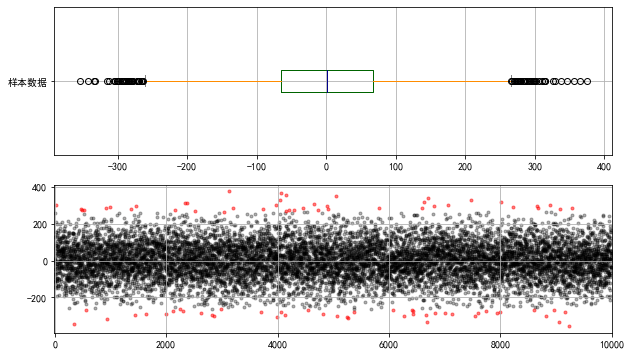

In [351]:
# 异常值分析
# （2）箱型图分析

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid = True,color = color,ax = ax1,label = '样本数据')
# 箱型图看数据分布情况
# 以内限为界

s = data.describe()
print(s)
print('------')
# 基本统计量

q1 = s['25%']
q3 = s['75%']
iqr = q3 - q1
mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr
print('分位差为：%.3f，下限为：%.3f，上限为：%.3f' % (iqr,mi,ma))
print('------')
# 计算分位差

ax2 = fig.add_subplot(2,1,2)
error = data[(data < mi) | (data > ma)]
data_c = data[(data >= mi) & (data <= ma)]
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()
# 图表表达

## 数据标准化

In [354]:
'''
数据的标准化（normalization）是将数据按比例缩放，使之落入一个小的特定区间。
 在某些比较和评价的指标处理中经常会用到，去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权
 
最典型的就是数据的归一化处理，即将数据统一映射到[0,1]区间上

0-1标准化 / Z-score标准化

'''

'\n数据的标准化（normalization）是将数据按比例缩放，使之落入一个小的特定区间。\n 在某些比较和评价的指标处理中经常会用到，去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权\n \n最典型的就是数据的归一化处理，即将数据统一映射到[0,1]区间上\n\n0-1标准化 / Z-score标准化\n\n'

In [360]:
# 数据标准化
# （1）0-1标准化
# 将数据的最大最小值记录下来，并通过Max-Min作为基数（即Min=0，Max=1）进行数据的归一化处理
# x = (x - Min) / (Max - Min)

df = pd.DataFrame({"value1":np.random.rand(10)*20,
                  'value2':np.random.rand(10)*100})
print(df.head())
print('------')
# 创建数据

def data_norm(df,*cols):
    df_n = df.copy()
    for col in cols:
        ma = df_n[col].max()
        mi = df_n[col].min()
        df_n[col + '_n'] = (df_n[col] - mi) / (ma - mi)
    return(df_n)
# 创建函数，标准化数据

df_n = data_norm(df,'value1','value2')
print(df_n.head())
# 标准化数据

      value1     value2
0   4.109404  30.648870
1  19.609644  15.458541
2  19.920702  92.716071
3  19.369846  49.578353
4   5.871941  23.612068
------
      value1     value2  value1_n  value2_n
0   4.109404  30.648870  0.164632  0.235813
1  19.609644  15.458541  0.983566  0.068225
2  19.920702  92.716071  1.000000  0.920571
3  19.369846  49.578353  0.970896  0.444653
4   5.871941  23.612068  0.257753  0.158179


In [362]:
# 数据标准化
# （2）Z-score标准化
# Z分数（z-score）,是一个分数与平均数的差再除以标准差的过程 → z=(x-μ)/σ，其中x为某一具体分数，μ为平均数，σ为标准差
# Z值的量代表着原始分数和母体平均值之间的距离，是以标准差为单位计算。在原始分数低于平均值时Z则为负数，反之则为正数
# 数学意义：一个给定分数距离平均数多少个标准差?

df = pd.DataFrame({"value1":np.random.rand(10) * 100,
                  'value2':np.random.rand(10) * 100})
print(df.head())
print('------')
# 创建数据

def data_Znorm(df, *cols):
    df_n = df.copy()
    for col in cols:
        u = df_n[col].mean()
        std = df_n[col].std()
        df_n[col + '_Zn'] = (df_n[col] - u) / std
    return(df_n)
# 创建函数，标准化数据

df_z = data_Znorm(df,'value1','value2')
u_z = df_z['value1_Zn'].mean()
std_z = df_z['value1_Zn'].std()
print(df_z)
print('标准化后value1的均值为:%.2f, 标准差为：%.2f' % (u_z, std_z))
# 标准化数据
# 经过处理的数据符合标准正态分布，即均值为0，标准差为1

# 什么情况用Z-score标准化：
# 在分类、聚类算法中，需要使用距离来度量相似性的时候，Z-score表现更好

      value1     value2
0  38.825035  65.986658
1  61.638816  87.007212
2   8.238258  56.987508
3  27.754313  60.837591
4  49.567563  64.769706
------
      value1     value2  value1_Zn  value2_Zn
0  38.825035  65.986658  -0.516733   0.357011
1  61.638816  87.007212   0.327437   1.760884
2   8.238258  56.987508  -1.648525  -0.244004
3  27.754313  60.837591  -0.926379   0.013127
4  49.567563  64.769706  -0.119231   0.275736
5  96.419219  27.945787   1.614403  -2.183577
6  91.945280  66.410531   1.448856   0.385320
7  48.508210  61.983116  -0.158430   0.089631
8  41.948181  48.982363  -0.401169  -0.778634
9  63.053175  65.499954   0.379772   0.324506
标准化后value1的均值为:-0.00, 标准差为：1.00


,value1,value2,value1_n,value2_n,f
B,24.542945,89.732307,0.845294,0.967266,0.894083
I,28.281397,75.024409,1.000000,0.732615,0.893046
H,21.465579,81.144469,0.717946,0.830255,0.762869
J,18.199108,91.784098,0.582772,1.000000,0.749663
G,13.239061,79.628690,0.377514,0.806072,0.548937
F,16.751510,43.421210,0.522867,0.228415,0.405086
A,19.952080,29.104183,0.655314,0.000000,0.393188
E,14.376690,50.128614,0.424591,0.335425,0.388925
C,11.617584,57.499593,0.310413,0.453022,0.367457
D,4.116469,50.082418,0.000000,0.334688,0.133875


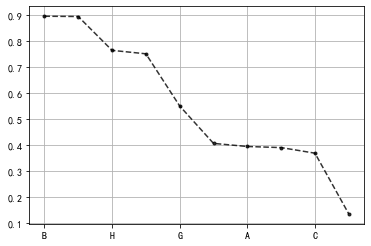

In [363]:
# 案例应用
# 八类产品的两个指标value1，value2，其中value1权重为0.6，value2权重为0.4
# 通过0-1标准化，判断哪个产品综合指标状况最好

df = pd.DataFrame({"value1":np.random.rand(10) * 30,
                  'value2':np.random.rand(10) * 100},
                 index = list('ABCDEFGHIJ'))
#print(df.head())
#print('------')
# 创建数据"

df_n1 = data_norm(df,'value1','value2')
# 进行标准化处理

df_n1['f'] = df_n1['value1_n'] * 0.6 + df_n1['value2_n'] * 0.4
df_n1.sort_values(by = 'f',inplace=True,ascending=False)
df_n1['f'].plot(kind = 'line', style = '--.k', alpha = 0.8, grid = True)
df_n1
# 查看综合指标状况

## 数据分组

In [364]:
'''
连续属性变换成分类属性，即连续属性离散化
在数值的取值范围内设定若干个离散划分点，将取值范围划分为一些离散化的区间，最后用不同的符号或整数值代表每个子区间中的数据值

等宽法 / 等频法 
'''

'\n连续属性变换成分类属性，即连续属性离散化\n在数值的取值范围内设定若干个离散划分点，将取值范围划分为一些离散化的区间，最后用不同的符号或整数值代表每个子区间中的数据值\n\n等宽法 / 等频法 \n'

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
<class 'pandas.core.arrays.categorical.Categorical'>
-------
[0 0 0 1 0 0 2 1 3 2 2 1] <class 'numpy.ndarray'>
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]') <class 'pandas.core.indexes.interval.IntervalIndex'>
(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64
-------
[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]
-------
['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']
-------
    ages     

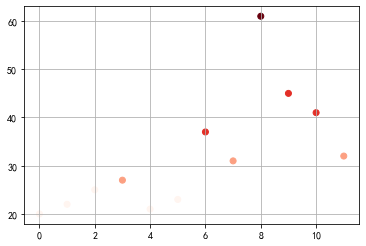

In [380]:
# 等宽法 → 将数据均匀划分成n等份，每份的间距相等
# cut方法

ages=[20,22,25,27,21,23,37,31,61,45,41,32]
# 有一组人员年龄数据，希望将这些数据划分为“18到25”,“26到35”,“36到60”,“60以上”几个面元

bins = [18,25,35,60,100]
cats = pd.cut(ages,bins)
print(cats)
print(type(cats))
print('-------')
# 返回的是一个特殊的Categorical对象 → 一组表示面元名称的字符串

print(cats.codes, type(cats.codes))  # 0-3对应分组后的四个区间，用代号来注释数据对应区间，结果为ndarray
print(cats.categories, type(cats.categories))  # 四个区间，结果为index
print(pd.value_counts(cats))  # 按照区间计数
print('-------')
# cut结果含有一个表示不同分类名称的层级数组以及一个年龄数据进行标号的代号属性

print(pd.cut(ages,[18,26,36,61,100],right=False))
print('-------')
# 通过right函数修改闭端，默认为True

group_names=['Youth','YoungAdult','MiddleAged','Senior']
print(pd.cut(ages,bins,labels=group_names))
print('-------')
# 可以设置自己的区间名称，用labels参数

df = pd.DataFrame({'ages':ages})
group_names=['Youth','YoungAdult','MiddleAged','Senior']
s = pd.cut(df['ages'],bins)  # 也可以 pd.cut(df['ages'],5),将数据等分为5份
df['label'] = s
cut_counts = s.value_counts(sort=False) 
print(df)
print(cut_counts)
# 对一个Dataframe数据进行离散化，并计算各个区间的数据计数

plt.scatter(df.index,df['ages'],cmap = 'Reds',c = cats.codes)
plt.grid()
# 用散点图表示，其中颜色按照codes分类
# 注意codes是来自于Categorical对象

0                  (-0.031, 0.618]
1                   (0.618, 2.913]
2                   (0.618, 2.913]
3    (-3.1839999999999997, -0.698]
4    (-3.1839999999999997, -0.698]
dtype: category
Categories (4, interval[float64]): [(-3.1839999999999997, -0.698] < (-0.698, -0.031] < (-0.031, 0.618] < (0.618, 2.913]]
(-3.1839999999999997, -0.698]    250
(-0.698, -0.031]                 250
(-0.031, 0.618]                  250
(0.618, 2.913]                   250
dtype: int64
------


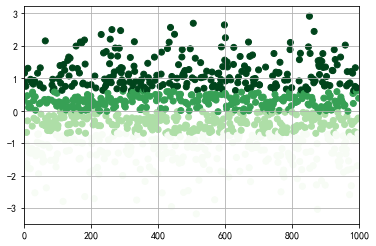

In [382]:
# 等频法 → 以相同数量的记录放进每个区间
# qcut方法

data = np.random.randn(1000)
s = pd.Series(data)
cats = pd.qcut(s,4)  # 按四分位数进行切割，可以试试 pd.qcut(data,10)
print(cats.head())
print(pd.value_counts(cats))
print('------')
# qcut → 根据样本分位数对数据进行面元划分，得到大小基本相等的面元，但并不能保证每个面元含有相同数据个数
# 也可以设置自定义的分位数（0到1之间的数值，包含端点） → pd.qcut(data1,[0,0.1,0.5,0.9,1])

plt.scatter(s.index,s,cmap = 'Greens',c = pd.qcut(data,4).codes)
plt.xlim([0,1000])
plt.grid()
# 用散点图表示，其中颜色按照codes分类
# 注意codes是来自于Categorical对象

# 数学建模

## 线性回归

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression   # 线型回归模块
%matplotlib inline


这里创建的方程是 $y = 8 + 4x + 随机值$

最后得到的方程是 $y =8.447659 + 4.004484x$， 还是比较接近的

[4.00448414]
8.447659499431026


D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26679 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25955 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current font.
  fon

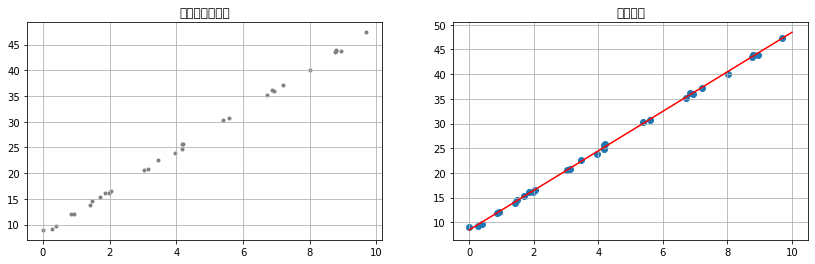

In [2]:
rng = np.random.RandomState(1)   # 设置随机数种子
xtrain = 10 * rng.rand(30)
ytrain = 8 + 4 * xtrain + rng.rand(30)
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1,2,1)
plt.scatter(xtrain, ytrain, marker = '.', color ='gray')
plt.grid()
plt.title("样本数据散点图")

# 拟合方程
model= LinearRegression()   # 建立模型
model.fit(xtrain[:,np.newaxis], ytrain)    # 传入x和y的值  这这里需要把xtrain转换一样，也不知道为啥y不需要转化
print(model.coef_)  # 斜率
print(model.intercept_) # 截距

# 预测值
xtest = np.linspace(0,10,1000)
ytest = model.predict(xtest[:,np.newaxis])

ax2 = fig.add_subplot(1,2,2)
plt.plot(xtest, ytest, color = 'r')
plt.scatter(xtrain, ytrain, marker = 'o')
plt.title("拟合数据")
plt.grid()

Text(0.5, 1.0, '绘制误差线')

D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21046 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24046 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\softwares\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 32472 missing from current font.
  fon

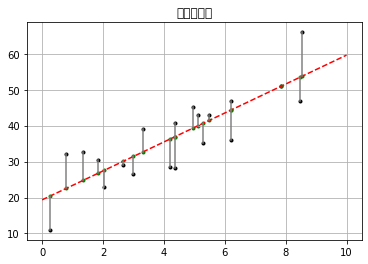

In [3]:
# 误差线
# 创建数据并进行拟合
rng = np.random.RandomState(2)
xtrain = rng.rand(20)*10
ytrain = 8 + 4*xtrain + rng.rand(20)*30
model = LinearRegression()
model.fit(xtrain[:,np.newaxis], ytrain)
xtest = np.linspace(0,10,1000)
ytest = model.predict(xtest[:,np.newaxis])

# 绘图
plt.plot(xtest, ytest, color = 'r', linestyle = '--')   # 绘制拟合的直线
plt.scatter(xtrain, ytrain, marker = '.', color = 'k')  # 绘制原始的点
ytest2 = model.predict(xtrain[:,np.newaxis])   # 原始x值在模型中得到的y值，拟合的值
plt.scatter(xtrain, ytest2, marker= '.', color = 'g')   # ytest2散点图
plt.plot([xtrain,xtrain],[ytrain, ytest2], color = 'gray')   # 误差线
plt.grid()
plt.title("绘制误差线")

In [4]:
# 多元线性回归

[ 1.5012069   2.00117753 -4.00340344  3.00076621]
20.486486888312793


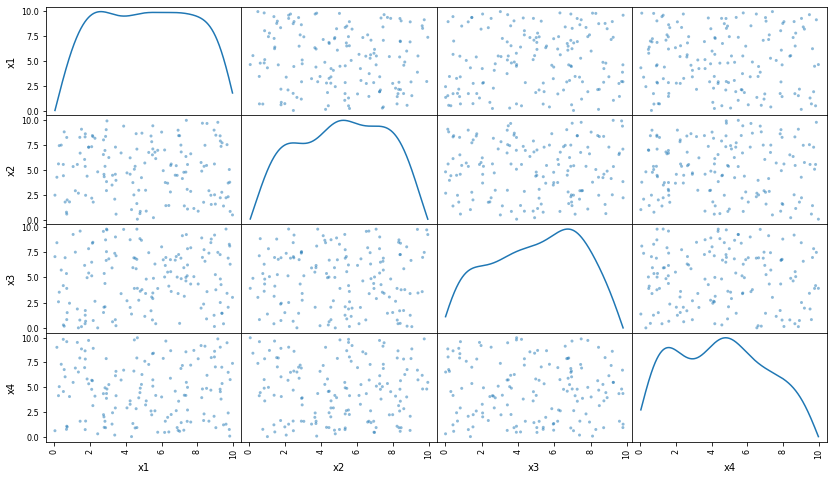

In [5]:
# 创建数据
rng = np.random.RandomState(3)
xtrain = 10 * rng.rand(150, 4)
ytrain = 20 + np.dot(xtrain, [1.5, 2, -4, 3]) + rng.rand(150)   # np.dot矩阵运算
# 这里np.dot相当于是y = 20 + 1.5*x1 + 2*x2 - 4*x3 + 3 *x4
df = pd.DataFrame(xtrain, columns=['x1', 'x2','x3','x4'])
df['y'] = ytrain

# 创建多元线性回归模型之前，需要先看一下自变量是否存在自相关，避免多重共线性
# 本次数据没有发现共线性
pd.plotting.scatter_matrix(df[['x1','x2','x3','x4']],
                          figsize = (14,8),
                           diagonal='kde',
                           alpha = 0.5,
                           range_padding= 0.1
                          )
# diagonal：({‘hist’, ‘kde’})，必须且只能在{‘hist’, ‘kde’}中选择1个 → 每个指标的频率图
# range_padding：(float, 可选)，图像在x轴、y轴原点附近的留白(padding)，该值越大，留白距离越大，图像远离坐标原点

# 创建多元回归模型
model = LinearRegression()
model.fit(df[['x1','x2','x3','x4']], df['y'])
print(model.coef_)   # 斜率
print(model.intercept_)  # 截距


In [7]:
# 模型评价
'''
通过几个参数验证回归模型

SSE(和方差、误差平方和)：The sum of squares due to error
MSE(均方差、方差)：Mean squared error
RMSE(均方根、标准差)：Root mean squared error
R-square(确定系数) Coefficient of determination

'''
from sklearn import metrics

In [14]:
# 创建数据
rng = np.random.RandomState(1)
xtrain = 10* rng.rand(30)
ytrain = 8+4*xtrain +rng.rand(30)*3

# 创建模型
model = LinearRegression()
model.fit(xtrain[:,np.newaxis], ytrain)
print(model.coef_)   # 系数
print(model.intercept_)  # 截距

ytest = model.predict(xtrain[:,np.newaxis])  # 求预测值

# 模型评价
mse = metrics.mean_squared_error(ytrain, ytest)  # 均方误差，前者是实际值，后者是预测值，顺序不要搞错
rmse = np.sqrt(mse)   # 均方根

# 计算R方
ssr = ((ytest - ytrain.mean()) ** 2).sum() # 求出预测数据与原始数据均值之差的平方和
sst = ((ytrain- ytrain.mean())**2).sum()  # 求出原始数据和均值之差的平方和
r2 = ssr/sst
print(r2)

# 计算R方，第二种方式
r22 = model.score(xtrain[:,np.newaxis], ytrain)
print(r22)
print("===========================")
print("均方差MSE为: %.5f" % mse)
print("均方根RMSE为: %.5f" % rmse)
print("确定系数R-square为: %.5f" % r22)
# 确定系数R-square非常接近于1，线性回归模型拟合较好

[4.01345241]
9.342978498293082
0.9946452159695
0.9946452159694995
均方差MSE为: 0.78471
均方根RMSE为: 0.88584
确定系数R-square为: 0.99465


## KNN最邻近分类

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors # 导入knn分类模块
plt.rcParams['font.sans-serif'] = ['SimHei']    # 图例中文显示问题
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore') 

Text(20, 90, '你的名字')

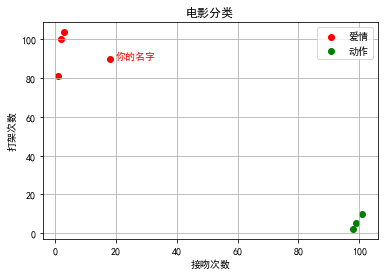

In [2]:
# 判断一部电影属于动作片还是爱情片
# 创建数据
data = pd.DataFrame({'name':['北京遇上西雅图','喜欢你','疯狂动物城','战狼2','力王','敢死队'],
                  'fight':[3,2,1,101,99,98],
                  'kiss':[104,100,81,10,5,2],
                  'type':['Romance','Romance','Romance','Action','Action','Action']})
data
plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type']=='Romance']['kiss'], marker = 'o', color = 'r', label = '爱情')
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type']=='Action']['kiss'], marker = 'o', color = 'g', label ='动作')
plt.grid()
plt.legend()
plt.title("电影分类")

# 构建分类模型
# from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(data[['fight','kiss']], data['type'])

# 《你的名字》 fight = 18, kiss = 90,进行分类预测
knn.predict([[18,90]])   # 得到的结果 array(['Romance'], dtype=object)，是爱情片

plt.scatter(18,90, color = 'r', marker = 'o', label = '爱情')
plt.xlabel("接吻次数")
plt.ylabel("打架次数")
plt.text(20,90, "你的名字", color = 'r')

Text(0.5, 0, 'fight')

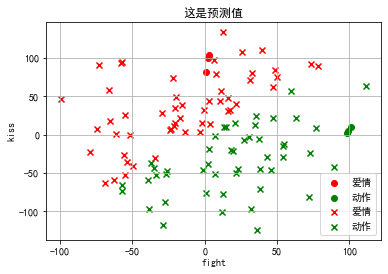

In [50]:
# 案例1
# 随机模拟数据进行分类
data2 = pd.DataFrame(np.random.randn(100,2)*50, columns= ['fight','kiss'])

data2['typetest'] = knn.predict(data2[['fight','kiss']])  # 代入刚才的模型预测，预测值直接作为列添加到data2

# 绘图
plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type']=='Romance']['kiss'], marker = 'o', color = 'r', label = '爱情')
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type']=='Action']['kiss'], marker = 'o', color = 'g', label ='动作')
plt.grid()
plt.legend()

plt.scatter(data2[data2['typetest'] == 'Romance']['fight'],data2[data2['typetest']=='Romance']['kiss'], marker = 'x', color = 'r', label = '爱情')
plt.scatter(data2[data2['typetest'] == 'Action']['fight'],data2[data2['typetest']=='Action']['kiss'], marker = 'x', color = 'g', label ='动作')
plt.title("这是预测值")
plt.legend()
plt.ylabel('kiss')
plt.xlabel('fight')

In [5]:
# 案例二：植物分类
# 根据花的各种特种数据对花进行分类，判断其属于哪一种花

from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
print('数据长度为:%i条' % len(iris['data']))
# 导入数据

print(iris.feature_names)
print(iris.target_names)
#print(iris.target)
print(iris.data[:5])
# 150个实例数据
# feature_names - 特征分类：萼片长度，萼片宽度，花瓣长度，花瓣宽度  → sepal length, sepal width, petal length, petal width
# 目标类别：Iris setosa, Iris versicolor, Iris virginica. 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
数据长度为:150条
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [72]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

ty =pd.DataFrame({'target':[0, 1, 2],
                 'target_names':iris.target_names
                 })
df = pd.merge(df, ty, on = 'target')

# 建模
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, df['target_names'])

# 预测模拟数据
pre_data = [[0.1,0.2,0.3,0.4]]
pre_data = pd.DataFrame(np.array([0.1,0.2,0.3,0.4]).reshape(1,4))
knn.predict(pre_data)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## PCA主成分分析

In [1]:
'''
最广泛无监督算法 + 基础的降维算法
通过线性变换将原始数据变换为一组各维度线性无关的表示，用于提取数据的主要特征分量 → 高维数据的降维

二维数据降维 / 多维数据降维 

'''

'\n最广泛无监督算法 + 基础的降维算法\n通过线性变换将原始数据变换为一组各维度线性无关的表示，用于提取数据的主要特征分量 → 高维数据的降维\n\n二维数据降维 / 多维数据降维 \n\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 矩阵乘法
ar1 = np.random.randint(1,7, size = (3,2))
ar1

array([[5, 6],
       [5, 3],
       [3, 5]])

In [4]:
ar2 = np.random.randint(1,7, size = (2,4))
ar2

array([[5, 5, 3, 6],
       [2, 3, 2, 4]])

In [5]:
print("矩阵1的形状:", ar1.shape)
print("矩阵2的形状:", ar2.shape)
ar3= np.dot(ar1, ar2)
print("矩阵乘法后的形状：", ar3.shape)
print(ar3)

矩阵1的形状: (3, 2)
矩阵2的形状: (2, 4)
矩阵乘法后的形状： (3, 4)
[[37 43 27 54]
 [31 34 21 42]
 [25 30 19 38]]


         x1        x2
0 -0.625302 -0.170064
1  0.960695  0.590901
2 -0.598543 -0.402593
3 -2.228059 -0.532577
4 -0.461430 -0.498867
(200, 2)


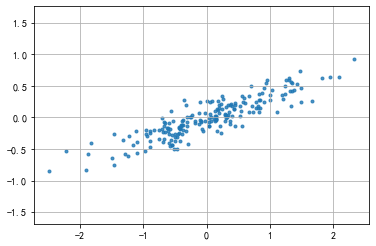

In [6]:
# 二维数据降维
rng = np.random.RandomState(1)
data = np.dot(rng.rand(2,2), rng.randn(2,200)).T
df = pd.DataFrame(data, columns= ['x1','x2'])
print(df.head())
print(df.shape)
plt.scatter(df['x1'], df['x2'],
           alpha = 0.8, 
            marker = '.'
           )
plt.axis('equal')   # 避免比例压缩为椭圆，x，y轴刻度等长
plt.grid()

In [7]:
# 构建模型，分析主成分
from sklearn.decomposition import PCA  # 加载主成分分析模块

pca = PCA(n_components= 1)  # ncomponents = 1意思是降为1维
pca.fit(df)   # 建立模型
# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)  
# n_components:  PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n
# copy: True或者False，默认为True → 表示是否在运行算法时，将原始训练数据复制一份
# fit(X,y=None) → 调用fit方法的对象本身。比如pca.fit(X)，表示用X对pca这个对象进行训练


PCA(n_components=1)

In [19]:
print(pca.explained_variance_)   # 输出特征值
print(pca.components_)    # 输出特征向量
print(pca.n_components_)  # 输出成分的个数
# components_：返回具有最大方差的成分。
# explained_variance_ratio_：返回 所保留的n个成分各自的方差百分比。
# n_components_：返回所保留的成分个数n。

# 这里是shape(200,2)降为shape(200,1)，只有1个特征值，对应2个特征向量
# 降维后主成分 A1 = -0.94446029 * X1 + -0.32862557 * X2  # 这一条不是很明白

[0.7625315]
[[-0.94446029 -0.32862557]]
1


In [20]:
x_pca = pca.transform(df)   # 数据转换,将二维数据转成一维数据
x_new = pca.inverse_transform(x_pca)  # 将以为数据再转成原始数据
# 需要注意的是，x_new的结果跟df不一样，但是求和之后是一样的

# 主成分分析，生成新的向量x_pca
# fit_transform(X) → 用X来训练PCA模型，同时返回降维后的数据，这里x_pca就是降维后的数据
# inverse_transform() → 将降维后的数据转换成原始数据


In [21]:
pd.DataFrame(x_new).sum()

0    6.702336
1   -0.816144
dtype: float64

In [22]:
df.sum()

x1    6.702336
x2   -0.816144
dtype: float64

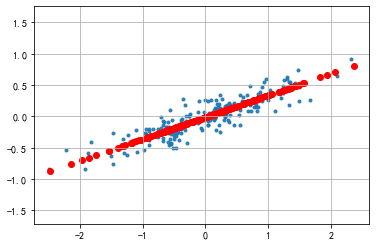

In [23]:
# 对生成的主成分绘图
plt.scatter(df['x1'], df['x2'], alpha= 0.9, marker = '.')
plt.scatter(x_new[:,0], x_new[:,1], color = 'r')
plt.axis('equal')
plt.grid()

In [24]:
# 多维数据降维，使用自带数据集
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())
print('数据长度为:%i条' % len(digits['data']))
print('数据形状为:',digits.data.shape)
print(digits.data[:2])

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
数据长度为:1797条
数据形状为: (1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]


original shape: (1797, 64)
transformed shape: (1797, 2)
[179.0069301  163.71774688]
(2, 64)
---------------------------------------------------


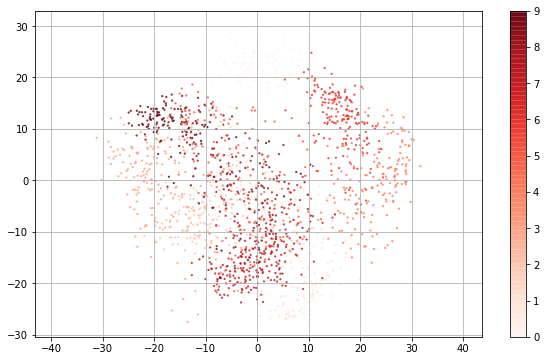

In [107]:
 # 构建模型，分析主成分
pca = PCA(n_components= 2)  # 降成二维
projected = pca.fit_transform(digits.data)
print('original shape:',digits.data.shape)
print('transformed shape:',projected.shape)
print(pca.explained_variance_)  # 输出特征值
print(pca.components_.shape) # 输出特征向量的形状
print("---------------------------------------------------")
# 降维后得到两个主成分，每个成分有64个特征向量

# 绘图
plt.figure(figsize = (10,6))
plt.scatter(projected[:,0], projected[:,1],
           c = digits.target,
            edgecolors='none',
            alpha= 0.8,
            cmap= 'Reds',
            s = 5,
           )
plt.axis('equal')
plt.grid()
plt.colorbar()


In [110]:
# 多维数据降维
# 主成分帅选

pca = PCA(n_components= 10)  # 降到10维
projected = pca.fit_transform(digits.data)
print('original shape:',digits.data.shape)
print('transformed shape:',projected.shape)
print(pca.explained_variance_)  # 输出特征值
print(pca.components_.shape)  # 输出特征向量形状
#print(projected)  # 输出解析后数据
# 降维后，得到10个成分，每个成分有64个特征向量

original shape: (1797, 64)
transformed shape: (1797, 10)
[179.0069301  163.71774688 141.78843908 101.10037513  69.51316491
  59.10852271  51.88453571  44.01500123  40.30960102  37.01171772]
(10, 64)


            b     b_sum
0  179.006930  0.201708
1  163.717747  0.386188
2  141.788439  0.545957
3  101.100375  0.659879
4   69.513165  0.738207
5   59.108523  0.804812
6   51.884536  0.863276
7   44.015001  0.912873
8   40.309601  0.958295
9   37.011718  1.000000


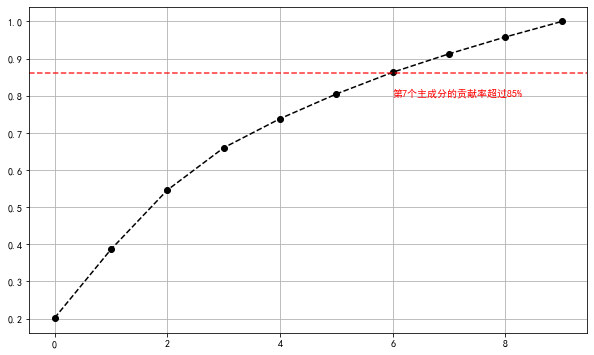

In [121]:
# 计算成分的贡献率
c_s = pd.DataFrame({'b':pca.explained_variance_,
                   'b_sum':pca.explained_variance_.cumsum()/pca.explained_variance_.sum()}
                  )
print(c_s)
# 做贡献率累计求和
# 可以看到第7个成分时候，贡献率超过85% → 选取前7个成分作为主成分
plt.figure(figsize = (10,6))
c_s['b_sum'].plot(style = '--ko')
plt.axhline(0.86, color = 'r', linestyle = '--', alpha = 0.8)
plt.text(6, 0.80, '第7个主成分的贡献率超过85%', color = 'r')
plt.grid()

## K-means聚类

In [26]:
'''
k均值聚类

最常用的机器学习聚类算法，且为典型的基于距离的聚类算法
K均值： 基于原型的、划分的距离技术，它试图发现用户指定个数(K)的簇
以欧式距离作为相似度测度
'''

'\nk均值聚类\n\n最常用的机器学习聚类算法，且为典型的基于距离的聚类算法\nK均值： 基于原型的、划分的距离技术，它试图发现用户指定个数(K)的簇\n以欧式距离作为相似度测度\n'

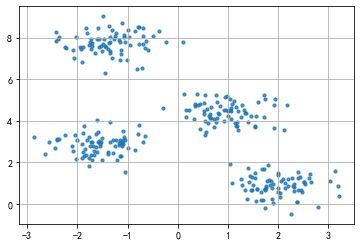

In [40]:
 # 创建数据
from sklearn.datasets import make_blobs
# make_blobs 聚类数据生成器

x, y_true = make_blobs(n_samples = 300,   # 生成300条数据
                      centers = 4,      # 分成4个类
                       cluster_std= 0.5,    # 方差一致
                       random_state= 0  
                      )

# 这里得到的x是具体数据，y_true是数据属于哪一类
# n_samples → 待生成的样本的总数。
# n_features → 每个样本的特征数。
# centers → 类别数
# cluster_std → 每个类别的方差，如多类数据不同方差，可设置为[1.0,3.0]（这里针对2类数据）
# random_state → 随机数种子
# x → 生成数据值， y → 生成数据对应的类别标签

pd.merge(pd.DataFrame(x), pd.DataFrame(y_true), left_index= True, right_index= True).head()

plt.scatter(x[:,0], x[:,1], 
            s= 10,    # 点的大小
            alpha= 0.8)
plt.grid()


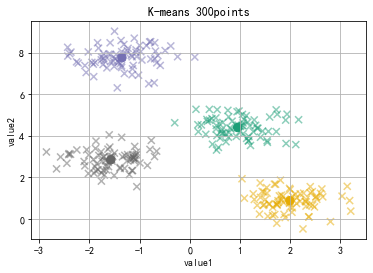

In [51]:
# 构建k均值模型
from sklearn.cluster import KMeans   # 导入模块

kmeans = KMeans(n_clusters= 4)  #目标是分成4类
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
centroids = kmeans.cluster_centers_    # 类中心的坐标
# 构建模型，并预测出样本的类别y_kmeans
# kmeans.cluster_centers_：得到不同簇的中心点

plt.scatter(x[:,0], x[:,1], c = y_kmeans,
           cmap='Dark2',
            s = 50, 
            alpha=0.5,
            marker = 'x'
           )
plt.scatter(centroids[:,0], centroids[:,1],
           c= [0,1,2,3],
            cmap = 'Dark2',
            s = 70,
            marker = 'o'
           )
plt.title("K-means 300points")
plt.xlabel("value1")
plt.ylabel("value2")
plt.grid()


## 蒙特卡洛模拟

In [52]:
'''

蒙特卡罗（Monte Carlo）方法，又称随机抽样或统计试验方法，是以概率和统计理论方法为基础的一种计算方法
使用随机数（或更常见的伪随机数）来解决很多计算问题的方法。
将所求解的问题同一定的概率模型相联系，用电子计算机实现统计模拟或抽样，以获得问题的近似解。
 
① π的计算
② 计算积分 y = x**2
③ 排队上厕所问题
'''

'\n\n蒙特卡罗（Monte Carlo）方法，又称随机抽样或统计试验方法，是以概率和统计理论方法为基础的一种计算方法\n使用随机数（或更常见的伪随机数）来解决很多计算问题的方法。\n将所求解的问题同一定的概率模型相联系，用电子计算机实现统计模拟或抽样，以获得问题的近似解。\n \n① π的计算\n② 计算积分 y = x**2\n③ 排队上厕所问题\n'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [73]:
# π的计算
n = 10000  # 生成随机点的个数
r = 1.0   # 圆的半径
a,b = (0., 0.)   # 圆的圆心坐标

# 正方形的边界
x_min, x_max = (a -r, a+ r)
y_min, y_max = (b -r, b+ r)

# 在正方形区域内随机生成点
x = np.random.uniform(x_min, x_max, n)
y = np.random.uniform(y_min, y_max, n)
# numpy.random.uniform(low,high,size) → 从一个均匀分布[low,high)中随机采样，均匀分布


d = np.sqrt((x-a)**2+ (y-b)**2)   ## 计算随机点到圆心的距离
res = sum(np.where(d<=r, 1, 0))   # 统计落在圆内的点的个数

pi = 4 * res/n
print("模拟预估π的值为：", pi)
print(res)
# 计算 pi 的近似值 → Monte Carlo方法：用统计值去近似真实值

模拟预估π的值为： 3.1432
7858


圆的面积等于 $\pi r^2$， 正方形的面积等于 $4r^2$，圆的面积除以正方形的面积等于 $\frac{\pi}{4}$

上面做的随机分布的点中，落在圆内的点的个数与正方形中点的个数之比 等于面积之比
即 $\frac{res}{n} = \frac{\pi}{4}$

所以$\pi = 4 * \frac{res}{n}$

n越大，得到的估计值越接近真实值

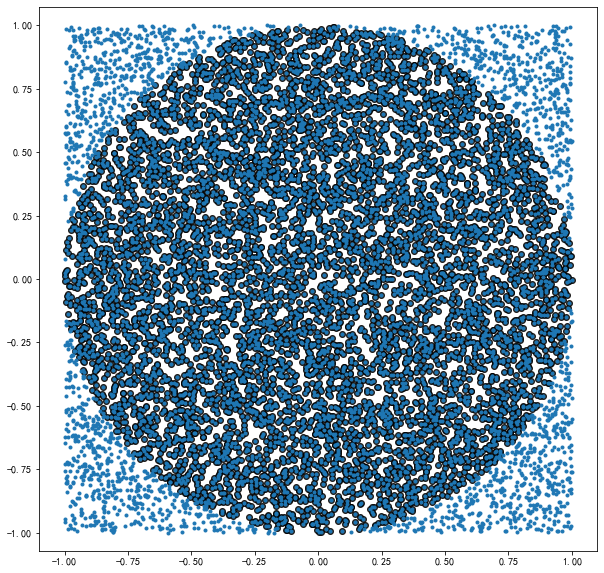

In [93]:
# 绘图, 深色部分就是圆
fig = plt.figure(figsize = (10,10))
axes = fig.add_subplot(1,1,1)
plt.plot(x, y, '.')
plt.axis('equal')
plt.scatter(x[d<=r], y[d<=r], color = 'black', marker = 'o', alpha = 0.8)

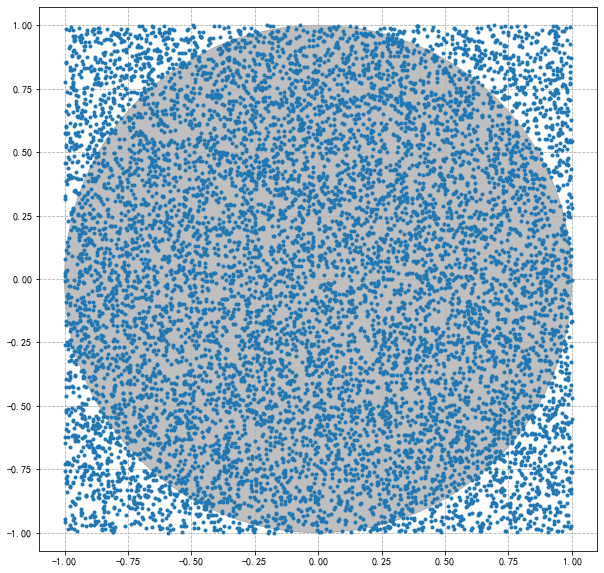

In [106]:
# 还可以用另外一种方式画圆
from matplotlib.patches import Circle

# 绘图, 深色部分就是圆
fig = plt.figure(figsize = (10,10))
axes = fig.add_subplot(1,1,1)
plt.plot(x, y, '.')
plt.axis('equal')
# plt.scatter(x[d<=r], y[d<=r], color = 'black', marker = 'o', alpha = 0.8)

circle = Circle(xy=(a,b),  # 圆心
               radius=r,  # 半径
                alpha = 0.5, 
                color = 'gray'
               )
axes.add_patch(circle)
plt.grid(True, linestyle = '--', linewidth = 0.8)
plt.show()

积分近似值 0.3356


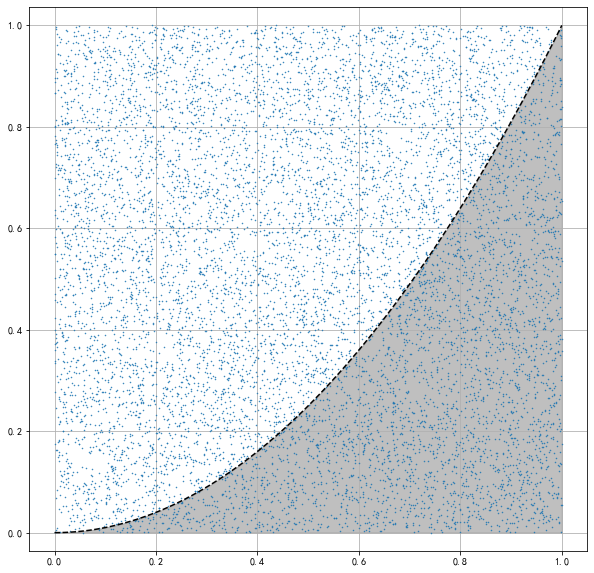

In [124]:
# 计算积分 y = x**2，核心思路与求π一样，计算点的数量占比
n = 10000

# 矩形边界
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0

# 均匀分布
x = np.random.uniform(x_min, x_max, n)
y = np.random.uniform(y_min, y_max, n)

# 创建函数
def f(x):
    return x**2

# 计算落在y=x**2下方的点的数量
res = sum(np.where(y < f(x), 1, 0))

# 积分近似值
integral = res/n
print("积分近似值", integral)

# 绘图
fig = plt.figure(figsize= (10,10))
axes = fig.add_subplot(1,1,1)
axes.plot(x, y, '.', markersize = 1)
plt.axis("equal")

# 绘制积分面积
xi = np.linspace(0,1, 100)
yi = f(xi)
plt.plot(xi, yi, '--k')
plt.fill_between(xi, yi, 0, color = 'gray', alpha =0.5, label = 'area')
plt.grid()

In [3]:
[0 for i in range(20)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

----------------
第2个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 0.4784700341744874 1.3330416055499748 2.23760496964561 3.570646575195585 0.8545715713754873 

第3个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.4130030719847606 3.570646575195585 1.4506835535105476 5.021330128706133 1.1576435032108243 

第4个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.4939317285504847 5.021330128706133 2.0300696113769323 7.051399740083065 2.527398400155648 

第5个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.6420723835022097 7.051399740083065 2.4559205105746997 9.507320250657765 4.409327356580855 

第6个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 3.807799179247102 9.507320250657765 2.5110208386050434 12.018341089262808 5.699521071410663 

第7个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 3.9150827852632055 12.018341089262808 2.5178438008891844 14.536184890151993 8.103258303999603 

第8个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 5.04625841172023 14.536184890151993 2.779191580492539 17.315376470644534 9.489926478431762 

第9个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 5.333314019195078 17.315376470644534 1.674824082748753 18.9

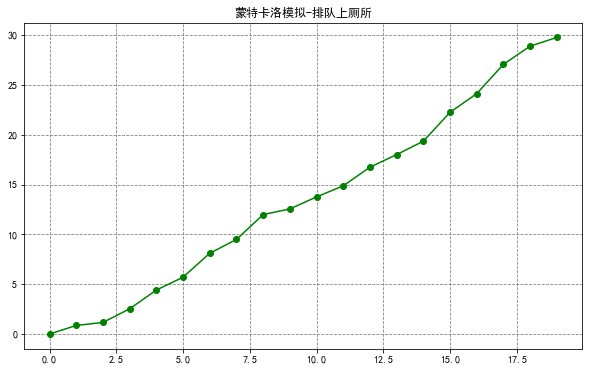

In [17]:
# 厕所排队问题
# 1、两场电影结束时间相隔较长，互不影响；
# 2、每场电影结束之后会有20个人想上厕所；
# 3、这20个人会在0到10分钟之内全部到达厕所）；
# 4、每个人上厕所时间在1-3分钟之间
# 首先模拟最简单的情况，也就是厕所只有一个位置，不考虑两人共用的情况则每人必须等上一人出恭完毕方可进行。
# 分析：对于每个人都有如下几个参数：
# 到达时间 / 等待时间 / 开始上厕所时间 / 结束时间


arrive_time = np.random.uniform(0,10, size = 20)
arrive_time.sort()
work_time = np.random.uniform(1,3, size = 20)
# np.random.uniform 生成均匀分布的随机数

start_time = [0 for i in range(20)]
finish_time = [0 for i in range(20)]
wait_time = [0 for i in range(20)]
empty_time = [0 for i in range(20)]

print("----------------")

# 第一个人之前没有人，所以开始时间 = 到达时间，第一个人的完成时间 = 开始时间+工作时间
start_time[0] = arrive_time[0]
finish_time[0] = start_time[0] + work_time[0]
wait_time[0] = start_time[0] - arrive_time[0]  # 第一个人不用等待，等待时间为0

# 从第二个人开始
for i in range(1, len(arrive_time)):
    
    if finish_time[i-1] > arrive_time[i]:  #如果前一个人完成时间大于这一个人的达到时间，就是说，这个人到了，前一个人还没解决完
        start_time[i] = finish_time[i-1]   # 那么这个人的开始时间等于前一个人的完成时间
    else:
        start_time[i] = arrive_time[i]   # 否则，这个人达到的时间就其开始时间
        empty_time[i] = arrive_time[i] - finish_time[i-1]  # 中间的空闲时间
    finish_time[i] = start_time[i] + work_time[i]
    wait_time[i] = start_time[i] - arrive_time[i]
    print('第%d个人：到达时间 开始时间 “工作”时间 完成时间 等待时间\n' %(i+1),
          arrive_time[i],
          start_time[i],
          work_time[i],
          finish_time[i],
          wait_time[i],
         '\n')

print("平均等待时间为", np.mean(wait_time))

# 将等待时间绘图
fig = plt.figure(figsize=(10,6))
plt.plot(wait_time, '-go')
plt.grid(True, linestyle = '--', color = 'gray', linewidth = 0.8)
plt.title("蒙特卡洛模拟-排队上厕所")
plt.show()